In [1]:
import pandas as pd
import numpy as np 
import csv

import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.formula.api as sms
import scipy.stats as stats

from math import sqrt

from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

## Question 1

### What parts of Chicago have the most fatalities?

In [2]:
df = pd.read_csv(r'data\ChicagoCrashes.csv')

In [3]:
df.describe()

,Unnamed: 0,CRASH_DATE_x,OCCUPANT_CNT,POSTED_SPEED_LIMIT,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,5.674540e+05,567454.000000,567454.000000,567454.000000,567454.000000,567454.000000,567454.000000,567454.000000,567454.000000,567454.000000,567454.000000,567454.000000,567454.0,567454.000000,567454.000000,567454.000000,567454.000000,567454.000000
mean,9.902120e+05,2018.055857,1.414790,28.886266,1233.984587,2.164947,0.247837,0.000583,0.022839,0.132985,0.091429,2.738002,0.0,13.370109,4.145027,6.718550,41.859575,-87.679433
std,5.947771e+05,1.284183,1.414401,5.920663,699.584890,0.562276,0.772229,0.029708,0.192876,0.571985,0.440527,2.007678,0.0,5.134394,1.960128,3.394868,0.084156,0.058152
min,1.000000e+00,2015.000000,0.000000,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,41.644670,-87.934014
25%,4.754942e+05,2017.000000,1.000000,30.000000,725.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,10.000000,2.000000,4.000000,41.787612,-87.721955
50%,9.658715e+05,2018.000000,1.000000,30.000000,1212.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.876469,-87.674814
75%,1.494691e+06,2019.000000,2.000000,30.000000,1821.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.0,17.000000,6.000000,10.000000,41.923777,-87.633237
max,2.115933e+06,2020.000000,60.000000,99.000000,2535.000000,15.000000,21.000000,3.000000,6.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,-87.524587


In [4]:
df2 = df.sample(frac=0.0005)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567454 entries, 0 to 567453
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     567454 non-null  int64  
 1   CRASH_DATE_x                   567454 non-null  int64  
 2   UNIT_TYPE                      567454 non-null  object 
 3   MAKE                           567454 non-null  object 
 4   MODEL                          567454 non-null  object 
 5   VEHICLE_DEFECT                 567454 non-null  object 
 6   VEHICLE_TYPE                   567454 non-null  object 
 7   VEHICLE_USE                    567454 non-null  object 
 8   MANEUVER                       567454 non-null  object 
 9   OCCUPANT_CNT                   567454 non-null  float64
 10  CRASH_DATE_y                   567454 non-null  object 
 11  POSTED_SPEED_LIMIT             567454 non-null  int64  
 12  TRAFFIC_CONTROL_DEVICE        

In [6]:
df1 = df[df['INJURIES_FATAL'] > 0]

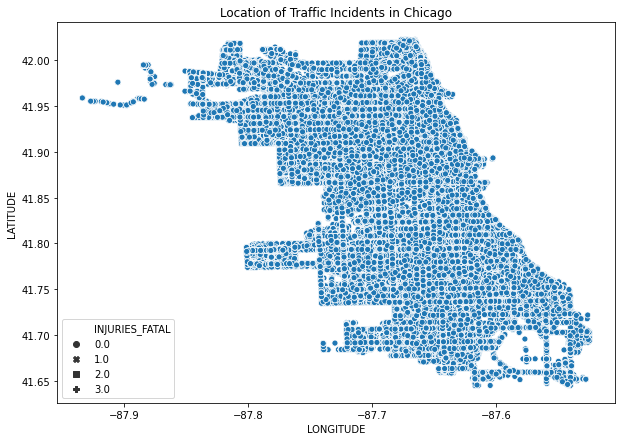

In [7]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['LONGITUDE'],y=df['LATITUDE'],style=df['INJURIES_FATAL'])
plt.legend(loc='lower left')
plt.title('Location of Traffic Incidents in Chicago')
plt.show()

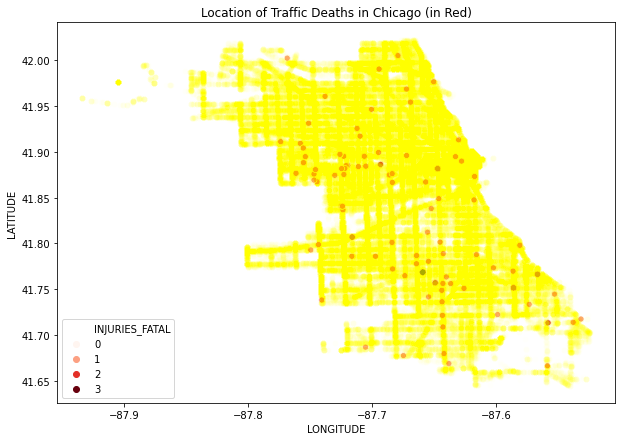

In [8]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df1['LONGITUDE'],y=df1['LATITUDE'],hue=df['INJURIES_FATAL'],palette='Reds')
sns.scatterplot(x=df['LONGITUDE'],y=df['LATITUDE'],color='Yellow',legend='brief',alpha=.01)
plt.legend(loc='lower left')
plt.title('Location of Traffic Deaths in Chicago (in Red)')
plt.show()

## Question 1 Insights

#### We can see that there is no discernible pattern to location. In the Graph above we can see the outline of Lake Michigan along the upper righthand side, with fatal accidents present at random locations around the Downtown Chicago Area.

In [8]:
# INJURIES_FATAL lists total fatalities in the incident
# df['MOST_SEVERE_INJURY'].unique()
# df.INJURIES_FATAL[df['INJURIES_FATAL']>1] = 1
# df.INJURIES_FATAL[df['INJURIES_FATAL']==0] = 0
df.INJURIES_FATAL.sum()
#

140.0

In [117]:
df['CRASH_DAY_OF_WEEK'].unique() # Sunday = 1

array([5, 2, 7, 4, 1, 6, 3], dtype=int64)

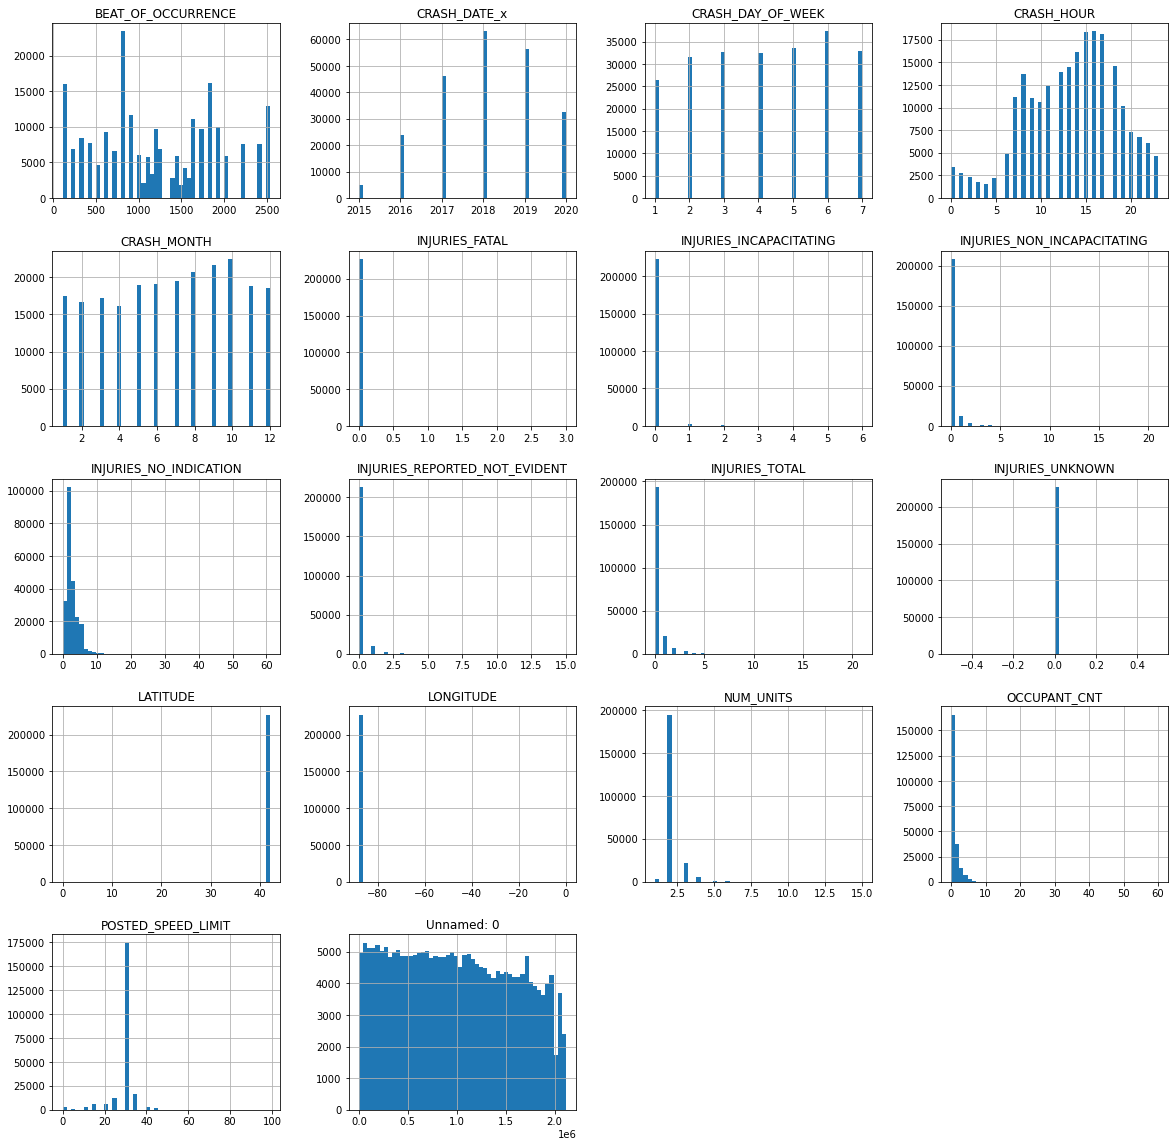

In [131]:
df.hist(figsize=(20,20),bins=50)
plt.show()
# quick observations - more likely to get in an accident on a Friday.
# after or around 3 PM to 5 PM (rush hour)
# October is most likely month in which to have an accident
# Speed limit in the Chicago city area is generally 35 MPH 
# most accidents involve 1 person only. 

### Train Test Split and OneHotEncode

In [122]:
# create a map 
# vehicle_defect_pairs = []

# for ix, row in enumerate(df.select("VEHICLE_DEFECT").distinct().collect()):
#   pair = (ix, row.VEHICLE_DEFECT)
#   vehicle_defect_pairs.append(pair)
# vehicle_defect_pairs

In [123]:
# feature_list = []

# for col in df.columns:
#   if col in ("_c0", "CRASH_RECORD_ID", "RD_NO_x", "CRASH_DATE_x", "VEHICLE_ID_x", "MODEL", "CRASH_DATE_y", "DATE_POLICE_NOTIFIED", "BEAT_OF_OCCURRENCE", "MOST_SEVERE_INJURY", "PERSON_ID", "RD_NO", "INJURY_CLASSIFICATION", "LOCATION", "LONGITUDE", "LATITUDE", "CRASH_TYPE"):
#     continue
#   else:
#     feature_list.append(col)

# assembler = VectorAssembler(inputCols=feature_list, outputCol="features")

In [100]:
# # # Remove "object"-type features from df
# cont_features = [col for col in df.columns if df[col].dtype in [np.float64, np.int64]]

# # # Remove "object"-type features from df
# df_cont = df.loc[:, cont_features]

In [101]:
# # Create df_cat which contains only the categorical variables
# features_cat = [col for col in df.columns if df[col].dtype in [np.object]]
# other_ind = []
# for col in features_cat:
#     others = list(df[df[col].str.contains("OTHER")].index)
#     for oth in others:
#         if oth in other_ind:
#             continue
#         else: other_ind.append(oth)
    
# df.drop(other_ind, inplace=True)
# df_cat = df.loc[:, features_cat]
# df_target = df.loc[:, ['INJURIES_FATAL']]

In [102]:
# df_target['INJURIES_FATAL'] = df_target['INJURIES_FATAL'].astype('category')

# df = df.drop("INJURIES_FATAL", axis=1)

In [103]:
# X = df[['MAKE', 'MODEL', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'OCCUPANT_CNT', 'MANEUVER', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'ROAD_DEFECT', 'CRASH_TYPE', 'CRASH_HOUR','CRASH_DAY_OF_WEEK', 'PERSON_TYPE', 'SEX', 'EJECTION', 'SAFETY_EQUIPMENT']]
# X = df.drop(columns='INJURIES_FATAL')
# target = df['INJURIES_FATAL']

In [124]:
# create a map 
# vehicle_defect_pairs = []

# for ix, row in enumerate(df.select("VEHICLE_DEFECT").distinct().collect()):
#   pair = (ix, row.VEHICLE_DEFECT)
#   vehicle_defect_pairs.append(pair)
# vehicle_defect_pairs